<a href="https://colab.research.google.com/github/TJConnellyContingentMacro/NU422/blob/master/Connelly_Terrence_Assignment_5_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis & Random Forest Classifiers on MNIST

**Management Problem & Summary: **

Implementing computer vision, classifying images, the predictive accuracy of models must be weighed against the costs of model development and implementation.   Principal component analysis (PCA) is one way to reduce dimensionality and was evaluated for potential use as a preliminary modeling technique before applying a Random Forest Classification (RFC).   

### Research Design, Measurement and Statistical Methods:  

First a RFC with ten estimators was applied to MNIST data.   MNIST ("Modified National Institute of Standards and Technology"), according to Kaggle.com, is the de facto “hello world” dataset of computer vision.  These handwritten images of numbers zero through nine have been the standard dataset for analyzing classification models since the dataset’s release in 1999.   Next PCA with 2 component, 4 components and then PCA with 95% explanatory power was deployed.    A RFC model was run again on the entire testing data with no model dials.   The model identified principle components were run through the RFC model with no dials.  Processing time was monitored at each step of the modeling.   Modeling was done using Google Colab notebooks with processing from Google’s GPU servers, typically faster than average processors.  

# Libraries and Ingest

In [2]:
import pandas as pd

import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
%matplotlib inline

import seaborn as sns  # pretty plotting, including heat map
plt.style.use('fivethirtyeight')

from datetime import datetime

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)


from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# BernoulliNB is designed for binary/boolean features
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import roc_auc_score   
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import export_graphviz


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

from sklearn.pipeline import Pipeline



from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)




import warnings
warnings.filterwarnings("ignore")

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

import os

PROJECT_ROOT_DIR = ""
CHAPTER_ID = ""

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "", CHAPTER_ID, fig_id)

print("All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.")

All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.


In [0]:
train = pd.read_csv('s3://terrenceconnelly/DigitRecog_train.csv')
test = pd.read_csv('s3://terrenceconnelly/DigitRecog_test.csv')

# EDA

In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [6]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

***Note***: since this won't be submitted to Kaggle, where one could get the correct labels for the test set, instead just use standard split of test/train data for the "test.csv" data

In [0]:
y = train["label"]
x = train.drop(labels = ["label"], axis = 1) 


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=11)


### Visualization prior to modeling

one of the images from the dataset of pixel values

count of each kind of image in training data

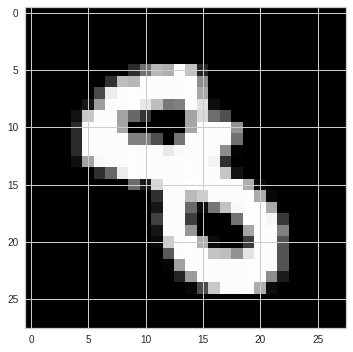

In [8]:
pic1 = y.loc[67]
pic2 = x.loc[67]
pic2 = np.array(pic2, dtype = 'uint8')
pic2 = pic2.reshape(28,28)
plt.imshow(pic2, cmap = 'gray')
plt.show()

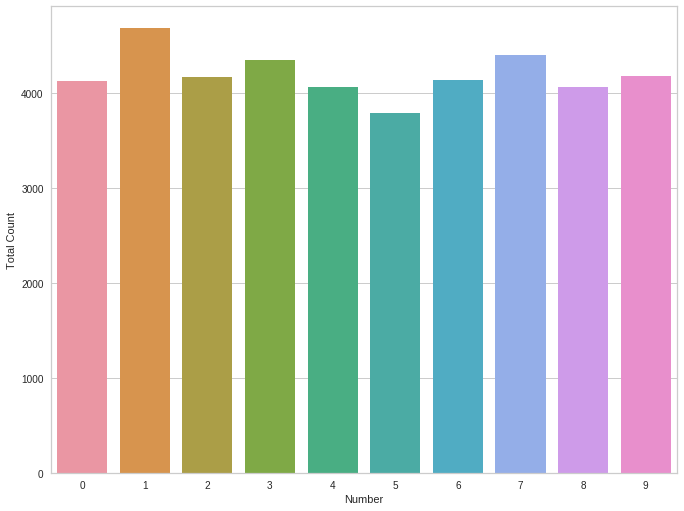

In [9]:
sns.countplot(x = "label", data = train)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.xlabel("Number")
plt.ylabel("Total Count")
plt.show()

# Modeling & Analysis

## Random Forest Classifiers with max features and 10 estimators

Random forest alone did a very good job of predicting the images correctly.    The accuracy score was nearly 0.94 and the confusion matrix allowed visual verification of this.   Processing time was fast at 2.5 seconds.

In [0]:
rfc = RandomForestClassifier(max_features = 'sqrt', n_estimators = 10, bootstrap = True)


In [11]:
y[9]

3

In [12]:
start=datetime.now()

rfc.fit(X_train, y_train)

end=datetime.now()
print(end-start)


0:00:02.686550


In [13]:
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9355952380952381

In [14]:
y_pred.shape

(8400,)

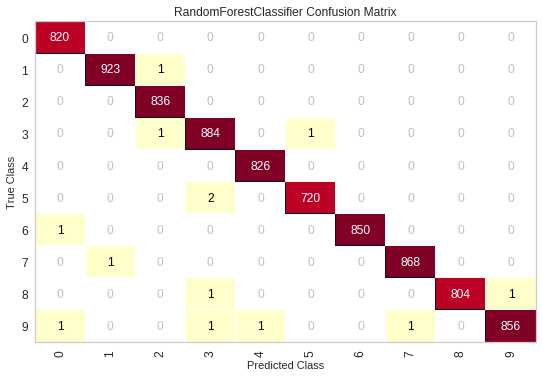

In [15]:
 cm = ConfusionMatrix(rfc, classes=[0,1,2,3,4,5,6,7,8,9])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-

cm.fit(X_test, y_test)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the

# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.poof()

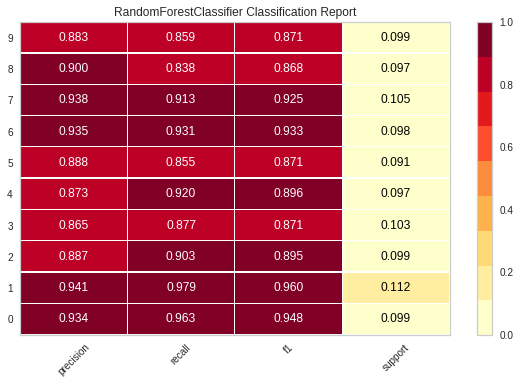

In [16]:
visualizer = ClassificationReport(rfc, support = 'percent')

visualizer.fit(X_test, y_test)
visualizer.score(X_train, y_train)  # Evaluate the model on the test data
visualizer.poof()   

In [17]:
accuracy_score(y_pred, y_test)

0.9355952380952381

## PCA

PCA model results revealed that many components would be necessary to explain 95% of the variability in the explanatory variables.   The first two and four components revealed visual predictions of numbers that only explained less than 10% of the variance.   Further analysis revealed that cumulative explained variance would reach 95% at about 90 variables.    	

In [18]:
pca = PCA(n_components = 2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
print(pca.explained_variance_ratio_)  

[0.098 0.071]


Text(0.5, 0.98, '2-Component PCA')

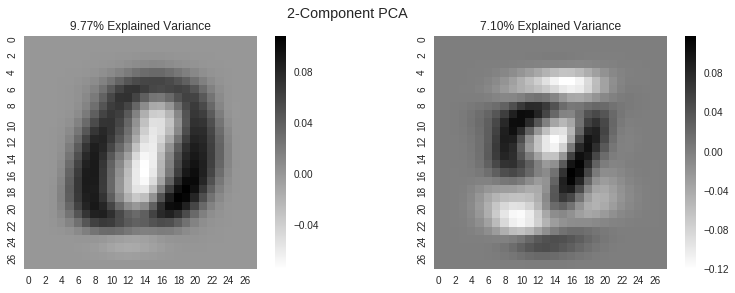

In [20]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('2-Component PCA')

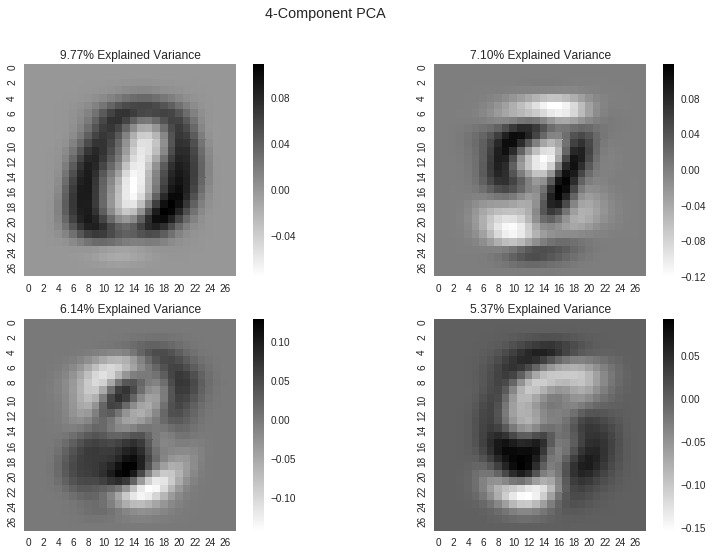

In [21]:
pca = PCA(n_components = 4)
pca.fit(X_train)
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')

axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[0][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')
pass


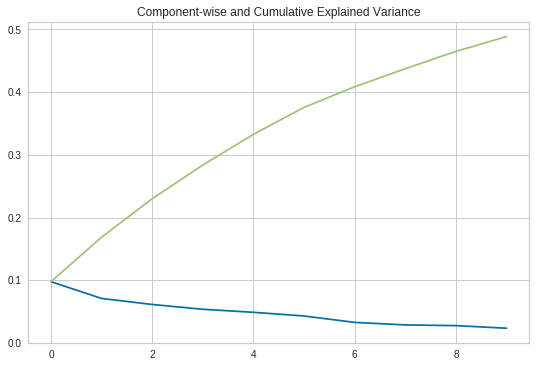

In [22]:
pca = PCA(n_components=10)
X_r = pca.fit(X_train).transform(X_train)

plt.plot(range(10), pca.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
pass

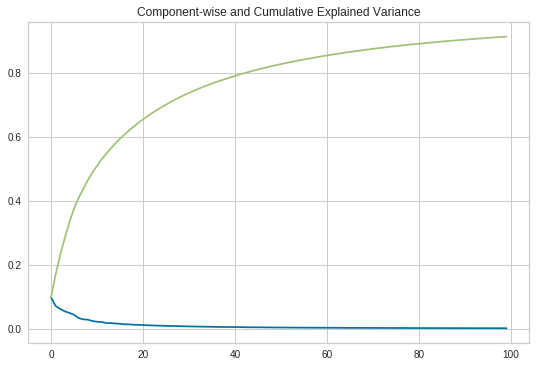

In [23]:
pca = PCA(n_components = 100)
X_r = pca.fit(X_train).transform(X_train)

plt.plot(range(100), pca.explained_variance_ratio_)
plt.plot(range(100), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
pass

In [24]:
start=datetime.now()

pca = PCA(.95)

# lower_dimensional_data = pca.fit_transform(X_train)

# pca.n_components_




end=datetime.now()
print(end-start)


0:00:00.000097


In [25]:

lower_dimensional_data = pca.fit_transform(X_train)
lower_dimensional_data 

array([[1108.721, -212.45 ,   43.82 , ...,   -2.914,   29.033,   38.117],
       [ 740.286,   -8.657,  137.886, ...,   50.75 ,   33.467,  -18.253],
       [-425.294, -131.462,  433.672, ...,  -57.646,  -12.519, -121.82 ],
       ...,
       [-501.274,   75.202,  284.775, ...,   64.075,  -12.235,    2.476],
       [-152.873,  824.379, -404.13 , ...,   46.638,  -49.95 ,  -14.432],
       [ 729.171,  361.675, 1108.562, ...,    3.017,   44.736,  -38.81 ]])

In [26]:
pca.n_components_

153

In [27]:
X_r = pca.fit(X_train).transform(X_train)
X_r

array([[1108.721, -212.45 ,   43.82 , ...,   -2.914,   29.033,   38.117],
       [ 740.286,   -8.657,  137.886, ...,   50.75 ,   33.467,  -18.253],
       [-425.294, -131.462,  433.672, ...,  -57.646,  -12.519, -121.82 ],
       ...,
       [-501.274,   75.202,  284.775, ...,   64.075,  -12.235,    2.476],
       [-152.873,  824.379, -404.13 , ...,   46.638,  -49.95 ,  -14.432],
       [ 729.171,  361.675, 1108.562, ...,    3.017,   44.736,  -38.81 ]])

In [0]:
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)


In [29]:
cum_var_exp.shape

(153,)

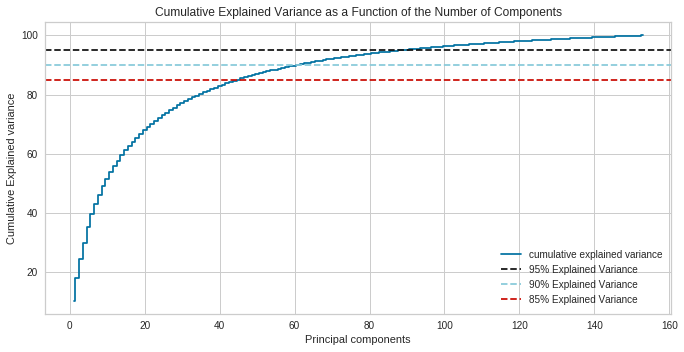

In [30]:

plt.figure(figsize=(10, 5))
plt.step(range(1, 154), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()


### Run RFC with unlimited esimators and PCA for classification

Finally, RFC on the traininng data set explaned 99.9% of the variability and took just 2.7 seconds.  PCA applied prior to RFC resulted in just a touch less explanatory (99.8%) and took longer to process at 4.7 seconds.  

In [0]:
rfc =RandomForestClassifier()

In [32]:
start=datetime.now()

rfc.fit(X_train, y_train)

end=datetime.now()
print("TIME TO RUN RFC on original TRAIN data: " + str(end-start))

TIME TO RUN RFC on original TRAIN data: 0:00:02.700592


In [33]:
rfc.score(X_train, y_train)

0.9989285714285714

In [34]:
start=datetime.now()

rfc.fit(X_r, y_train)

end=datetime.now()
print(end-start)
print("TIME TO RUN RFC on PCA train data: " + str(end-start))

0:00:05.555338
TIME TO RUN RFC on PCA train data: 0:00:05.555338


In [35]:
# y_pred = rfc.predict(X_r)
rfc.score(X_r, y_train)

0.9987797619047619

In [0]:
X_pcatest = pca.fit(X_test).transform(X_test)


In [37]:
start=datetime.now()

rfc.fit(X_pcatest, y_test)

end=datetime.now()

print("TIME TO RUN RFC on PCA TEST data: " + str(end-start))


TIME TO RUN RFC on PCA TEST data: 0:00:00.926206


In [38]:
rfc.score(X_pcatest, y_test)

0.9983333333333333

In [39]:
start=datetime.now()

rfc.fit(X_test, y_test)


end=datetime.now()
print("TIME TO RUN RFC on TEST data (no PCA): " + str(end-start))

TIME TO RUN RFC on TEST data (no PCA): 0:00:00.439084


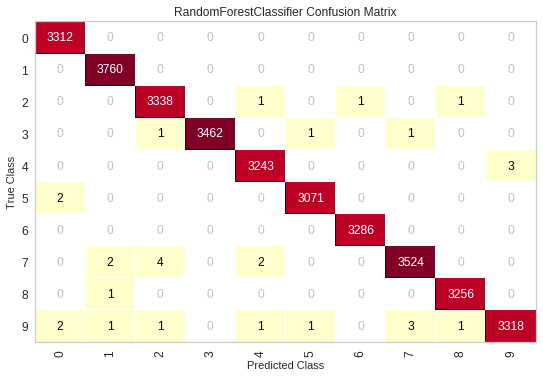

In [40]:
 cm = ConfusionMatrix(rfc, classes=[0,1,2,3,4,5,6,7,8,9])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-

cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the

# and then creates the confusion_matrix from scikit-learn.
cm.score(X_train, y_train)
# How did we do?
cm.poof()

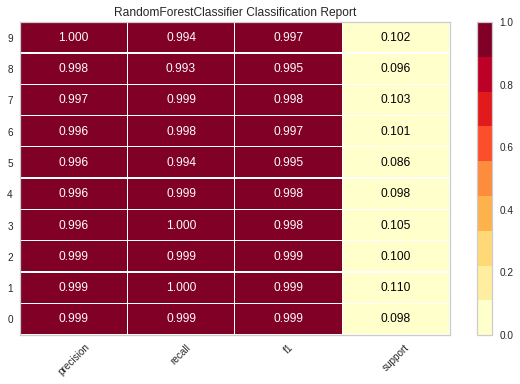

In [41]:
visualizer = ClassificationReport(rfc, support = 'percent')

visualizer.fit(X_pcatest, y_test)
visualizer.score(X_pcatest, y_test)  # Evaluate the model
visualizer.poof()   

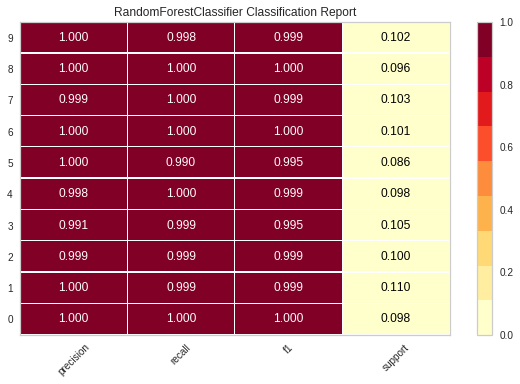

In [42]:
visualizer = ClassificationReport(rfc, support = 'percent')

visualizer.fit(X_test, y_test)
visualizer.score(X_test, y_test)  # Evaluate the model
visualizer.poof()   

# Conclusions

  PCA is of limited use as a means of reducing dimensionality prior to employing models like a RFC.   
*  Given the large number of principle components required on some data and additional processing time, RFC by itself is of greater use.  

*   Our analysis suggested PCA offered less predictive value, comparing the confusion matrix below with that of the RFC shown in the results section.  




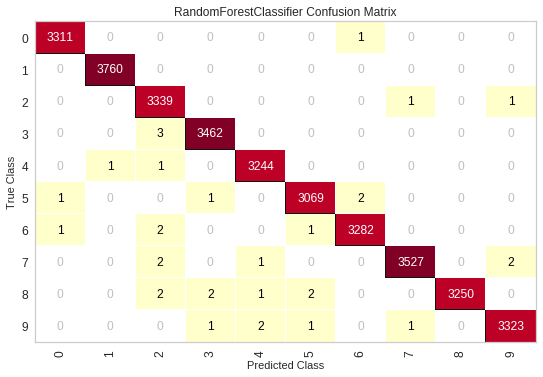

In [43]:
 cm = ConfusionMatrix(rfc, classes=[0,1,2,3,4,5,6,7,8,9])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-

cm.fit(X_r, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the

# and then creates the confusion_matrix from scikit-learn.
cm.score(X_r, y_train)
# How did we do?
cm.poof()